In [1]:
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import torch
import torch.nn as nn
from torchsummary import summary
from IPython.display import clear_output
from typing import Dict
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.tensorboard.summary import hparams


from src.Blocks import DownBlock
from src.Blocks import BottleNeck
from src.Blocks import UpBlock

from src.DataLoaders import ImageDataset
from torch.utils.data import  DataLoader

from src.Runet import RunetModel

from torchvision import transforms, utils
import src.DataLoaders as DataLoaders 
import numpy as np
import matplotlib.pyplot as plt
  

In [2]:
torch.set_float32_matmul_precision('medium')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


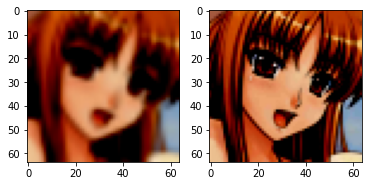

In [3]:

transform1 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transform2 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.Resize((64, 64)),

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageDataset(root='../data/portraits', transform1=transform1, transform2=transform2,max_samples=100)
dataloader = DataLoader(dataset, batch_size=32, num_workers=0)
for i, (img1, img2) in enumerate(dataloader):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(img1[0].numpy(), (1, 2, 0)))
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(img2[0].numpy(), (1, 2, 0)))
    plt.show()
    break

In [4]:
proportions = [.75, .10, .15]
lengths = [int(p * len(dataset)) for p in proportions]
lengths[-1] = len(dataset) - sum(lengths[:-1])

tr_dataset, vl_dataset, ts_dataset = torch.utils.data.random_split(dataset, lengths)

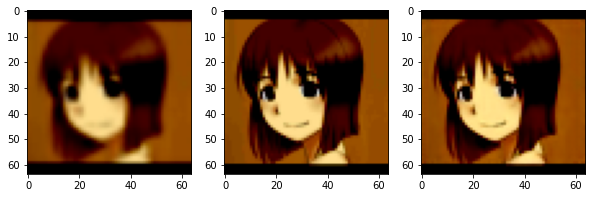

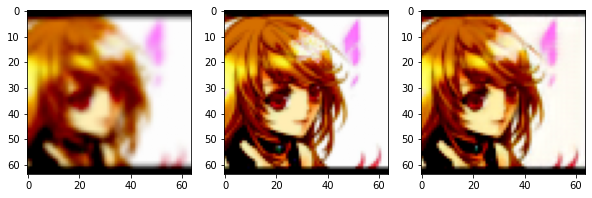

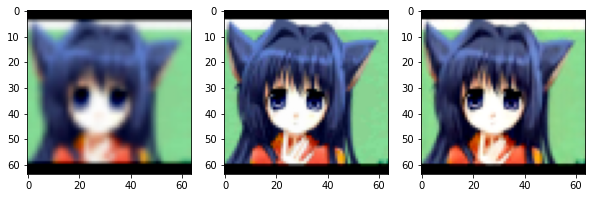

`Trainer.fit` stopped: `max_epochs=1` reached.


Checkpoint saved at 0


In [8]:
torch.autograd.set_detect_anomaly(True)
model = RunetModel(tr_dataset, vl_dataset, ts_dataset,lr=.001,save_every_n_epoch=10)
model.load_checkpoint("checkpoints/last.pth")
trainer = pl.Trainer(accelerator='gpu', devices=1, max_epochs=1,log_every_n_steps=1)
trainer.fit(model)

In [6]:
model.save_checkpoint("checkpoints/last.pth")

Checkpoint saved at 86
